In [1]:
pip install pymodbus pyserial pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import serial.tools.list_ports

ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Found port: {port.device} - {port.description}")


Found port: COM3 - Standard Serial over Bluetooth link (COM3)
Found port: COM6 - Standard Serial over Bluetooth link (COM6)
Found port: COM7 - USB Serial Port (COM7)


In [6]:
from pymodbus.client import ModbusSerialClient
import time
import csv

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(
    port="COM7",  # Change based on your system
    baudrate=9600,
    stopbits=1,
    bytesize=8,
    parity="N",
    timeout=3
)

# ✅ Register Addresses (Subtract 1 for pymodbus)
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 1,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 1,
    "Temperature (°F)": 45203 - 1,
    "Temperature (°C)": 45204 - 1,
    "X-Axis RMS Velocity (in/sec)": 45205 - 1,
    "X-Axis RMS Velocity (mm/sec)": 45206 - 1,
    "Z-Axis Peak Acceleration (G)": 45207 - 1,
    "X-Axis Peak Acceleration (G)": 45208 - 1,
    "Z-Axis Peak Velocity (in/sec)": 45217 - 1,
    "Z-Axis Peak Velocity (mm/sec)": 45218 - 1,
    "X-Axis Peak Velocity (in/sec)": 45219 - 1,
    "X-Axis Peak Velocity (mm/sec)": 45220 - 1,
    "Z-Axis High-Frequency RMS Acceleration (G)": 45221 - 1,
    "X-Axis High-Frequency RMS Acceleration (G)": 45222 - 1,
}

# ✅ Scaling Factors (Based on Data)
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
    "Temperature (°C)": 327.67 / 32767,
    "X-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis Peak Acceleration (G)": 65.535 / 65535,
    "X-Axis Peak Acceleration (G)": 65.535 / 65535,
    "Z-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "X-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
    "X-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    """Reads Modbus register and applies scaling factor."""
    try:
        response = client.read_holding_registers(address=address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Start Continuous Data Collection
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    while True:
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        data_row = [timestamp]

        for param, reg in REGISTERS.items():
            value = read_register(reg, SCALING_FACTORS[param])
            data_row.append(value)

        # ✅ Save data to CSV
        with open(DATA_FILE, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(data_row)

        print(f"📊 Data Saved: {data_row}")

        time.sleep(1)  # Adjust based on data collection frequency

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

❌ Failed to connect
Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Faile

could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Failed to connect[ModbusS

could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Failed to connect[ModbusS

could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Failed to connect[ModbusS

could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Failed to connect[ModbusS

could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denied.', None, 5)
could not open port 'COM7': PermissionError(13, 'Access is denie

Error reading register 45200: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45201: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45202: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45203: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45204: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45205: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45206: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45207: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45216: Modbus Error: [Connection] Failed to connect[ModbusSerialClient COM7:0]
Error reading register 45217: Modbus Error: [Connection] Failed to connect[ModbusS

In [1]:
from pymodbus.client import ModbusSerialClient
import time
import csv

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(
    port="COM7",  # Change based on your system
    baudrate=19200,
    stopbits=1,
    bytesize=8,
    parity="N",
    timeout=3
)

# ✅ Register Addresses (Subtract 1 for pymodbus)
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 1,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 1,
    "Temperature (°F)": 45203 - 1,
    "Temperature (°C)": 45204 - 1,
    "X-Axis RMS Velocity (in/sec)": 45205 - 1,
    "X-Axis RMS Velocity (mm/sec)": 45206 - 1,
    "Z-Axis Peak Acceleration (G)": 45207 - 1,
    "X-Axis Peak Acceleration (G)": 45208 - 1,
    "Z-Axis Peak Velocity (in/sec)": 45217 - 1,
    "Z-Axis Peak Velocity (mm/sec)": 45218 - 1,
    "X-Axis Peak Velocity (in/sec)": 45219 - 1,
    "X-Axis Peak Velocity (mm/sec)": 45220 - 1,
    "Z-Axis High-Frequency RMS Acceleration (G)": 45221 - 1,
    "X-Axis High-Frequency RMS Acceleration (G)": 45222 - 1,
}

# ✅ Scaling Factors (Based on Data)
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
    "Temperature (°C)": 327.67 / 32767,
    "X-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis Peak Acceleration (G)": 65.535 / 65535,
    "X-Axis Peak Acceleration (G)": 65.535 / 65535,
    "Z-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "X-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
    "X-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    """Reads Modbus register and applies scaling factor."""
    try:
        response = client.read_holding_registers(address=address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Start Continuous Data Collection
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    while True:
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        data_row = [timestamp]

        for param, reg in REGISTERS.items():
            value = read_register(reg, SCALING_FACTORS[param])
            data_row.append(value)

        # ✅ Save data to CSV
        with open(DATA_FILE, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(data_row)

        print(f"📊 Data Saved: {data_row}")

        time.sleep(1)  # Adjust based on data collection frequency

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


✅ Connected to Modbus RTU device
📊 Data Saved: ['2025-02-10 11:46:45', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:47', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:48', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:50', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:51', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:53', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:54', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:55', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
📊 Data Saved: ['2025-02-10 11:46:57', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [5]:
from pymodbus.client import ModbusSerialClient

client = ModbusSerialClient(
    port="COM7", baudrate=19200, stopbits=1, bytesize=8, parity="N", timeout=3
)

if client.connect():
    print("✅ Connected to Modbus Device")

    # Try reading a single register (Z-Axis RMS Velocity in/sec)
    reg_address = 45201 - 1  # Adjust for 0-based indexing
    response = client.read_holding_registers(reg_address, count=1, slave=1)

    if response and response.registers:
        print(f"📌 Raw Register Value: {response.registers[0]}")
    else:
        print("❌ No response or invalid register.")

    client.close()
else:
    print("❌ Connection failed.")


✅ Connected to Modbus Device
📌 Raw Register Value: 0


In [5]:
from pymodbus.client import ModbusSerialClient
import time
import csv

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(
    port="COM7",  # Change based on your system
    baudrate=19200,
    stopbits=1,
    bytesize=8,
    parity="N",
    timeout=3
)

# ✅ Register Addresses (Subtract 1 for pymodbus)
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 1,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 1,
    "Temperature (°F)": 45203 - 1,
    "Temperature (°C)": 45204 - 1,
    "X-Axis RMS Velocity (in/sec)": 45205 - 1,
    "X-Axis RMS Velocity (mm/sec)": 45206 - 1,
    "Z-Axis Peak Acceleration (G)": 45207 - 1,
    "X-Axis Peak Acceleration (G)": 45208 - 1,
    "Z-Axis Peak Velocity (in/sec)": 45217 - 1,
    "Z-Axis Peak Velocity (mm/sec)": 45218 - 1,
    "X-Axis Peak Velocity (in/sec)": 45219 - 1,
    "X-Axis Peak Velocity (mm/sec)": 45220 - 1,
    "Z-Axis High-Frequency RMS Acceleration (G)": 45221 - 1,
    "X-Axis High-Frequency RMS Acceleration (G)": 45222 - 1,
}

# ✅ Scaling Factors (Based on Data)
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
    "Temperature (°C)": 327.67 / 32767,
    "X-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis Peak Acceleration (G)": 65.535 / 65535,
    "X-Axis Peak Acceleration (G)": 65.535 / 65535,
    "Z-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "X-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
    "X-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    """Reads Modbus register and applies scaling factor."""
    try:
        response = client.read_holding_registers(reg_address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Start Continuous Data Collection
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    while True:
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        data_row = [timestamp]

        for param, reg in REGISTERS.items():
            value = read_register(reg, SCALING_FACTORS[param])
            data_row.append(value)

        # ✅ Save data to CSV
        
        with open(DATA_FILE, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(data_row)

        print(f"📊 Data Saved: {data_row}")

        time.sleep(1)  # Adjust based on data collection frequency

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


✅ Connected to Modbus RTU device
Error reading register 45200: name 'reg_address' is not defined
Error reading register 45201: name 'reg_address' is not defined
Error reading register 45202: name 'reg_address' is not defined
Error reading register 45203: name 'reg_address' is not defined
Error reading register 45204: name 'reg_address' is not defined
Error reading register 45205: name 'reg_address' is not defined
Error reading register 45206: name 'reg_address' is not defined
Error reading register 45207: name 'reg_address' is not defined
Error reading register 45216: name 'reg_address' is not defined
Error reading register 45217: name 'reg_address' is not defined
Error reading register 45218: name 'reg_address' is not defined
Error reading register 45219: name 'reg_address' is not defined
Error reading register 45220: name 'reg_address' is not defined
Error reading register 45221: name 'reg_address' is not defined
📊 Data Saved: ['2025-02-10 12:09:51', None, None, None, None, None, Non

In [23]:
from pymodbus.client import ModbusSerialClient
import time
import csv

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(
    port="COM7",  # Change based on your system
    baudrate=19200,
    stopbits=1,
    bytesize=8,
    parity="N",
    timeout=3
)

# ✅ Register Addresses (Subtract 1 for pymodbus)
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 40001,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 40001,
    "Temperature (°F)": 45203 - 40001,
    "Temperature (°C)": 45204 - 40001,
    "X-Axis RMS Velocity (in/sec)": 45205 - 40001,
    "X-Axis RMS Velocity (mm/sec)": 45206 - 40001,
    "Z-Axis Peak Acceleration (G)": 45207 - 40001,
    "X-Axis Peak Acceleration (G)": 45208 - 40001,
    "Z-Axis Peak Velocity (in/sec)": 45217 - 40001,
    "Z-Axis Peak Velocity (mm/sec)": 45218 - 40001,
    "X-Axis Peak Velocity (in/sec)": 45219 - 40001,
    "X-Axis Peak Velocity (mm/sec)": 45220 - 40001,
    "Z-Axis High-Frequency RMS Acceleration (G)": 45221 - 40001,
    "X-Axis High-Frequency RMS Acceleration (G)": 45222 - 40001,
}

# ✅ Scaling Factors (Based on Data)
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
    "Temperature (°C)": 327.67 / 32767,
    "X-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis Peak Acceleration (G)": 65.535 / 65535,
    "X-Axis Peak Acceleration (G)": 65.535 / 65535,
    "Z-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "X-Axis Peak Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis Peak Velocity (mm/sec)": 65.535 / 65535,
    "Z-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
    "X-Axis High-Frequency RMS Acceleration (G)": 65.535 / 65535,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    """Reads Modbus register and applies scaling factor."""
    try:
        response = client.read_holding_registers(address=address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Start Continuous Data Collection
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    while True:
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        data_row = [timestamp]

        for param, reg in REGISTERS.items():
            value = read_register(reg, SCALING_FACTORS[param])
            data_row.append(value)

        # ✅ Save data to CSV
        with open(DATA_FILE, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(data_row)

        print(f"📊 Data Saved: {data_row}")

        time.sleep(1)  # Adjust based on data collection frequency

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


✅ Connected to Modbus RTU device
📊 Data Saved: ['2025-02-10 16:42:00', 0.014, 0.356, 90.63, 32.57, 0.042, 1.063, 0.041, 0.044, 0.02, 0.503, 0.059, 1.504, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:02', 0.014, 0.356, 90.63, 32.57, 0.042, 1.063, 0.041, 0.044, 0.02, 0.503, 0.059, 1.504, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:03', 0.015, 0.386, 90.63, 32.57, 0.06, 1.518, 0.044, 0.035, 0.021, 0.547, 0.084, 2.147, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:05', 0.015, 0.386, 90.59, 32.55, 0.06, 1.518, 0.044, 0.035, 0.021, 0.547, 0.084, 2.147, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:06', 0.015, 0.386, 90.59, 32.55, 0.06, 1.518, 0.044, 0.035, 0.021, 0.547, 0.084, 2.147, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:07', 0.015, 0.386, 90.59, 32.55, 0.06, 1.518, 0.044, 0.035, 0.021, 0.547, 0.084, 2.147, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:09', 0.017, 0.439, 90.59, 32.55, 0.034, 0.874, 0.04, 0.04, 0.024, 0.621, 0.049, 1.236, 0.01, 0.01]
📊 Data Saved: ['2025-02-10 16:42:10',

✅ Connected to Modbus RTU device


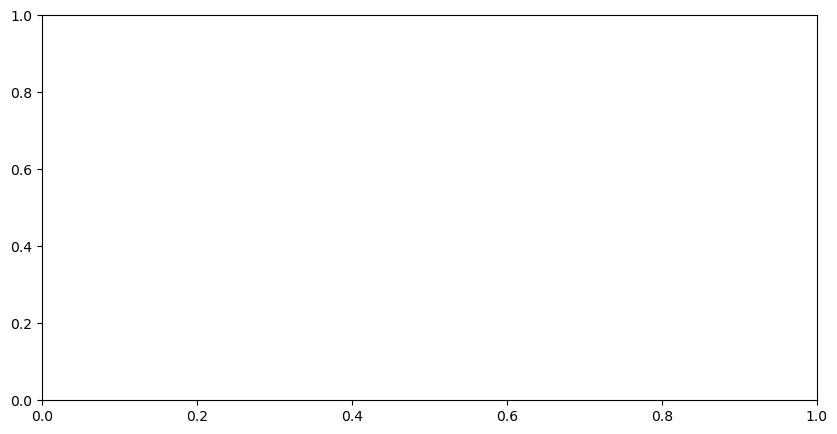

In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pymodbus.client import ModbusSerialClient
import time
import collections

# ✅ Configure Modbus Client
client = ModbusSerialClient(
    port="COM7",
    baudrate=19200,
    stopbits=1,
    bytesize=8,
    parity="N",
    timeout=3
)

# ✅ Define Registers & Scaling
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 40001,
    "X-Axis RMS Velocity (in/sec)": 45205 - 40001,
}

SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "X-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
}

# ✅ Buffer to store recent values (for smooth plotting)
BUFFER_SIZE = 50  # Store last 50 values
data_buffer = {
    "Z-Axis RMS Velocity (in/sec)": collections.deque([0] * BUFFER_SIZE, maxlen=BUFFER_SIZE),
    "X-Axis RMS Velocity (in/sec)": collections.deque([0] * BUFFER_SIZE, maxlen=BUFFER_SIZE),
    "timestamps": collections.deque([time.strftime("%H:%M:%S")] * BUFFER_SIZE, maxlen=BUFFER_SIZE),
}

# ✅ Function to Read Modbus Registers
def read_register(address, scale_factor):
    response = client.read_holding_registers(address=address, count=1, slave=1)
    if response and response.registers:
        raw_value = response.registers[0]
        return round(raw_value * scale_factor, 3)
    return None

# ✅ Update function for animation
def update(frame):
    timestamp = time.strftime("%H:%M:%S")
    data_buffer["timestamps"].append(timestamp)

    for param, reg in REGISTERS.items():
        value = read_register(reg, SCALING_FACTORS[param])
        data_buffer[param].append(value if value is not None else 0)

    ax.clear()
    ax.plot(data_buffer["timestamps"], data_buffer["Z-Axis RMS Velocity (in/sec)"], label="Z-Axis RMS Velocity", color='blue')
    ax.plot(data_buffer["timestamps"], data_buffer["X-Axis RMS Velocity (in/sec)"], label="X-Axis RMS Velocity", color='red')

    ax.set_title("Real-Time Vibration Monitoring")
    ax.set_xlabel("Time")
    ax.set_ylabel("Velocity (in/sec)")
    ax.legend()
    ax.set_xticklabels(data_buffer["timestamps"], rotation=45, ha="right")
    ax.grid(True)

# ✅ Set up Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 5))
ani = animation.FuncAnimation(fig, update, interval=1000, save_count=50)
  # Update every 1 second

# ✅ Start Modbus Connection & Show Plot
if client.connect():
    print("✅ Connected to Modbus RTU device")
    plt.show()
else:
    print("❌ Failed to connect")

client.close()


✅ Connected to Modbus RTU device


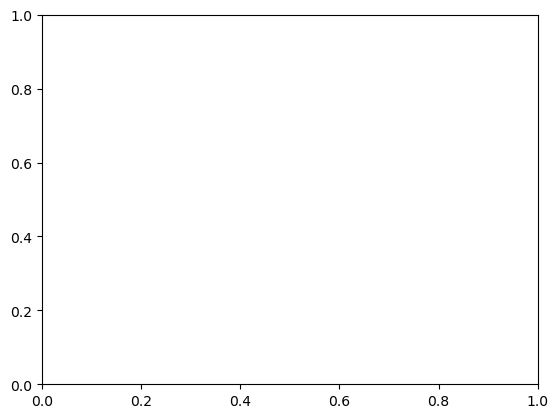

In [18]:
from pymodbus.client import ModbusSerialClient
import time
import csv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(port="COM7", baudrate=19200, stopbits=1, bytesize=8, parity="N", timeout=3)

# ✅ Register Addresses
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 40001,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 40001,
    "Temperature (°F)": 45203 - 40001,
}

# ✅ Threshold Values for Alerts 🚨
THRESHOLDS = {
    "Z-Axis RMS Velocity (in/sec)": 3.0,   # Example threshold
    "Z-Axis RMS Velocity (mm/sec)": 50.0,  # Example threshold
    "Temperature (°F)": 200.0,              # Example threshold
}

# ✅ Scaling Factors
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    try:
        response = client.read_holding_registers(address=address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Alert Function 🚨
def check_alerts(data):
    for param, value in data.items():
        if value is not None and value > THRESHOLDS[param]:
            print(f"🚨 ALERT: {param} exceeded threshold! Current Value: {value} | Limit: {THRESHOLDS[param]}")

# ✅ Initialize Plot
fig, ax = plt.subplots()
x_data, y_data = [], []

def update(frame):
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
    data_row = {"Timestamp": timestamp}

    for param, reg in REGISTERS.items():
        value = read_register(reg, SCALING_FACTORS[param])
        data_row[param] = value

    # ✅ Check Alerts
    check_alerts(data_row)

    # ✅ Save data to CSV
    with open(DATA_FILE, mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(data_row.values())

    # ✅ Update Plot
    x_data.append(timestamp)
    y_data.append(data_row["Z-Axis RMS Velocity (in/sec)"])  # Change parameter as needed
    ax.clear()
    ax.plot(x_data[-50:], y_data[-50:], label="Z-Axis RMS Velocity (in/sec)", color="b")
    ax.axhline(THRESHOLDS["Z-Axis RMS Velocity (in/sec)"], color='r', linestyle='--', label="Threshold")
    ax.legend()
    ax.set_title("Real-Time Vibration Data")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Velocity (in/sec)")
    ax.tick_params(axis="x", rotation=45)

# ✅ Start Continuous Monitoring
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    ani = animation.FuncAnimation(fig, update, interval=1000, save_count=50)
    plt.show()

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


In [20]:
#this is how you can create alert manually 
from pymodbus.client import ModbusSerialClient
import time
import csv

# ✅ Configure Modbus RTU Client
client = ModbusSerialClient(port="COM7", baudrate=19200, stopbits=1, bytesize=8, parity="N", timeout=3)

# ✅ Register Addresses
REGISTERS = {
    "Z-Axis RMS Velocity (in/sec)": 45201 - 40001,
    "Z-Axis RMS Velocity (mm/sec)": 45202 - 40001,
    "Temperature (°F)": 45203 - 40001,
}

# ✅ Threshold Values for Alerts 🚨
THRESHOLDS = {
    "Z-Axis RMS Velocity (in/sec)": 3.0,   # Example threshold
    "Z-Axis RMS Velocity (mm/sec)": 50.0,  # Example threshold
    "Temperature (°F)": 200.0,              # Example threshold
}

# ✅ Scaling Factors
SCALING_FACTORS = {
    "Z-Axis RMS Velocity (in/sec)": 6.5535 / 65535,
    "Z-Axis RMS Velocity (mm/sec)": 65.535 / 65535,
    "Temperature (°F)": 327.67 / 32767,
}

# ✅ Create CSV File
DATA_FILE = "vibration_data.csv"

with open(DATA_FILE, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp"] + list(REGISTERS.keys()))  # CSV Headers

# ✅ Function to Read Modbus Register
def read_register(address, scale_factor):
    try:
        response = client.read_holding_registers(address=address, count=1, slave=1)
        if response and response.registers:
            raw_value = response.registers[0]
            return round(raw_value * scale_factor, 3)
        else:
            return None
    except Exception as e:
        print(f"Error reading register {address}: {e}")
        return None

# ✅ Alert Function 🚨
# ✅ Alert Function 🚨
def check_alerts(data):
    for param, value in data.items():
        if param == "Timestamp":  # Skip timestamp
            continue
        if value is not None and value > THRESHOLDS.get(param, float('inf')):  
            print(f"🚨 ALERT: {param} exceeded threshold! Current Value: {value} | Limit: {THRESHOLDS[param]}")

# ✅ Start Continuous Monitoring
try:
    if client.connect():
        print("✅ Connected to Modbus RTU device")
    else:
        print("❌ Failed to connect")
        exit()

    while True:
        timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
        data_row = {"Timestamp": timestamp}

        for param, reg in REGISTERS.items():
            value = read_register(reg, SCALING_FACTORS[param])
            data_row[param] = value

        # ✅ Check Alerts
        check_alerts(data_row)

        # ✅ Save data to CSV
        with open(DATA_FILE, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(data_row.values())

        print(f"📊 Data Saved: {data_row}")

        time.sleep(1)  # Adjust based on data collection frequency

except KeyboardInterrupt:
    print("\n📌 Data collection stopped.")
finally:
    client.close()


✅ Connected to Modbus RTU device
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:05', 'Z-Axis RMS Velocity (in/sec)': 0.006, 'Z-Axis RMS Velocity (mm/sec)': 0.142, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:06', 'Z-Axis RMS Velocity (in/sec)': 0.006, 'Z-Axis RMS Velocity (mm/sec)': 0.142, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:07', 'Z-Axis RMS Velocity (in/sec)': 0.006, 'Z-Axis RMS Velocity (mm/sec)': 0.142, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:08', 'Z-Axis RMS Velocity (in/sec)': 0.006, 'Z-Axis RMS Velocity (mm/sec)': 0.142, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:09', 'Z-Axis RMS Velocity (in/sec)': 0.006, 'Z-Axis RMS Velocity (mm/sec)': 0.142, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp': '2025-02-10 12:34:10', 'Z-Axis RMS Velocity (in/sec)': 0.007, 'Z-Axis RMS Velocity (mm/sec)': 0.18, 'Temperature (°F)': 108.24}
📊 Data Saved: {'Timestamp'

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from datetime import datetime

# Load Dataset
df = pd.read_csv("vibration_data.csv", encoding="latin1")

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Select features for anomaly detection
features = [
    "Z-Axis RMS Velocity (in/sec)", "X-Axis RMS Velocity (in/sec)",
    "Temperature (°F)", "Z-Axis Peak Acceleration (G)", "X-Axis Peak Acceleration (G)",
    "Z-Axis Peak Velocity (mm/sec)", "X-Axis Peak Velocity (mm/sec)"
]
X = df[features]

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)
df['Anomaly'] = model.predict(X)
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # Convert to 0 (normal) and 1 (anomaly)

# Define anomaly detection function for live data
def detect_anomaly(live_data):
    live_df = pd.DataFrame([live_data], columns=features)
    prediction = model.predict(live_df)
    return "Anomaly" if prediction[0] == -1 else "Normal"

# Example real-time monitoring simulation
live_data_example = {
    "Z-Axis RMS Velocity (in/sec)": 0.2,
    "X-Axis RMS Velocity (in/sec)": 0.1,
    "Temperature (°F)": 92,
    "Z-Axis Peak Acceleration (G)": 0.8,
    "X-Axis Peak Acceleration (G)": 0.05,
    "Z-Axis Peak Velocity (mm/sec)": 5,
    "X-Axis Peak Velocity (mm/sec)": 5
}

print("Live Data Anomaly Detection:", detect_anomaly(live_data_example))

# Save the trained model
import joblib
joblib.dump(model, "isolation_forest_model.pkl")

Live Data Anomaly Detection: Anomaly


['isolation_forest_model.pkl']